In [2]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split as tts
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score


In [3]:
data=pd.read_csv(r"for_model.csv")

In [20]:
data=data.sample(frac = 1,ignore_index=True)

In [ ]:
data=data.drop("Unnamed: 0",axis=1)

In [5]:
dept=list(data["Department"].unique())

In [18]:
data=data.groupby('Department', group_keys=False).apply(lambda x: x.sample(48, replace=True)).reset_index(drop=True)

In [21]:
data

,Complaint,Priority,Department
0,An open electric pole wire is sparking and pos...,Emergency,Muncipal Coporation Department
1,Raw sewage is flowing into drinking water pipe...,Emergency,Muncipal Coporation Department
2,"My friend has gone missing, last seen near the...",Emergency,Police Department
3,A transgender individual is being discriminate...,Moderate,Human Right Department
4,Someone keeps throwing garbage in front of my ...,Less Priority,Police Department
...,...,...,...
571,A remote tribal community is not receiving gov...,Moderate,Social Welfare Department
572,A hotel denied entry to an individual based on...,Less Priority,Human Right Department
573,Firecrackers ignited a small fire in an empty ...,Moderate,Fire Department
574,A child is frequently seen inappropriately dre...,Moderate,Child Welfare Department


In [22]:
data["Complaint"]=data["Complaint"].apply(lambda x: x.lower())

In [23]:
data["Complaint"]=data["Complaint"].apply(lambda x: x.replace("(","").replace(")","").replace("\'","").replace("-","").replace(",","").replace(":","").replace(".","").replace("!",""))

In [24]:
for i in data["Complaint"]:
    print(i)

an open electric pole wire is sparking and posing an electrocution risk
raw sewage is flowing into drinking water pipelines
my friend has gone missing last seen near the railway station
a transgender individual is being discriminated against in employment
someone keeps throwing garbage in front of my house every night
someone hacked my bank account and transferred all my money
a local goon is harassing girls and threatening them with acid attacks
a landslide has blocked all exit routes and villagers are cut off from essential supplies
a public event is not wheelchair accessible
a fraudulent loan company is extorting customers with illegal interest rates
a local supermarket is mislabeling imported goods as locally made
my friends often dismiss my safety concerns as overreacting
a home inverter battery exploded causing a small fire
a bank officer is asking for a commission to approve my loan faster
a community garden for elderly citizens is not being maintained
a road repair project has 

In [25]:
stopword_list=stopwords.words("english")

In [27]:
l=[]
for i in range(576):
    temp=data["Complaint"].iloc[i].split()
    j=0
    while j!=len(temp):
        if temp[j] in stopword_list:
            temp.pop(j)
        else:
            j+=1
    l.append(temp)
l

[['open',
  'electric',
  'pole',
  'wire',
  'sparking',
  'posing',
  'electrocution',
  'risk'],
 ['raw', 'sewage', 'flowing', 'drinking', 'water', 'pipelines'],
 ['friend', 'gone', 'missing', 'last', 'seen', 'near', 'railway', 'station'],
 ['transgender', 'individual', 'discriminated', 'employment'],
 ['someone',
  'keeps',
  'throwing',
  'garbage',
  'front',
  'house',
  'every',
  'night'],
 ['someone', 'hacked', 'bank', 'account', 'transferred', 'money'],
 ['local', 'goon', 'harassing', 'girls', 'threatening', 'acid', 'attacks'],
 ['landslide',
  'blocked',
  'exit',
  'routes',
  'villagers',
  'cut',
  'essential',
  'supplies'],
 ['public', 'event', 'wheelchair', 'accessible'],
 ['fraudulent',
  'loan',
  'company',
  'extorting',
  'customers',
  'illegal',
  'interest',
  'rates'],
 ['local',
  'supermarket',
  'mislabeling',
  'imported',
  'goods',
  'locally',
  'made'],
 ['friends', 'often', 'dismiss', 'safety', 'concerns', 'overreacting'],
 ['home', 'inverter', 'batt

In [28]:
for i in range(len(l)):
    l[i]=" ".join(l[i])
l

['open electric pole wire sparking posing electrocution risk',
 'raw sewage flowing drinking water pipelines',
 'friend gone missing last seen near railway station',
 'transgender individual discriminated employment',
 'someone keeps throwing garbage front house every night',
 'someone hacked bank account transferred money',
 'local goon harassing girls threatening acid attacks',
 'landslide blocked exit routes villagers cut essential supplies',
 'public event wheelchair accessible',
 'fraudulent loan company extorting customers illegal interest rates',
 'local supermarket mislabeling imported goods locally made',
 'friends often dismiss safety concerns overreacting',
 'home inverter battery exploded causing small fire',
 'bank officer asking commission approve loan faster',
 'community garden elderly citizens maintained',
 'road repair project abandoned halfway',
 '7yearold boy found wandering alone market',
 'public toilets extremely unhygienic conditions need maintenance',
 'free me

In [29]:
data["Complaint"]=l
data["Complaint"]

0      open electric pole wire sparking posing electr...
1            raw sewage flowing drinking water pipelines
2      friend gone missing last seen near railway sta...
3        transgender individual discriminated employment
4      someone keeps throwing garbage front house eve...
                             ...                        
571     remote tribal community receiving government aid
572       hotel denied entry individual based appearance
573            firecrackers ignited small fire empty lot
574    child frequently seen inappropriately dressed ...
575         home service provider complete work properly
Name: Complaint, Length: 576, dtype: object

In [30]:
word_tokenize(data["Complaint"].iloc[0])

['open',
 'electric',
 'pole',
 'wire',
 'sparking',
 'posing',
 'electrocution',
 'risk']

In [31]:
lemmatizer = WordNetLemmatizer()

In [32]:
for i in word_tokenize(data["Complaint"].iloc[0]):
    print(lemmatizer.lemmatize(i))

open
electric
pole
wire
sparking
posing
electrocution
risk


In [33]:
l = []
for i in data["Complaint"]:
    words = word_tokenize(i)
    lemmatized_words =" ".join([lemmatizer.lemmatize(word) for word in words])
    l.append(lemmatized_words)
len(l)

576

In [34]:
l

['open electric pole wire sparking posing electrocution risk',
 'raw sewage flowing drinking water pipeline',
 'friend gone missing last seen near railway station',
 'transgender individual discriminated employment',
 'someone keep throwing garbage front house every night',
 'someone hacked bank account transferred money',
 'local goon harassing girl threatening acid attack',
 'landslide blocked exit route villager cut essential supply',
 'public event wheelchair accessible',
 'fraudulent loan company extorting customer illegal interest rate',
 'local supermarket mislabeling imported good locally made',
 'friend often dismiss safety concern overreacting',
 'home inverter battery exploded causing small fire',
 'bank officer asking commission approve loan faster',
 'community garden elderly citizen maintained',
 'road repair project abandoned halfway',
 '7yearold boy found wandering alone market',
 'public toilet extremely unhygienic condition need maintenance',
 'free medical checkup ca

In [35]:
data["Complaint"]=l

In [36]:
data["Complaint"]

0      open electric pole wire sparking posing electr...
1             raw sewage flowing drinking water pipeline
2      friend gone missing last seen near railway sta...
3        transgender individual discriminated employment
4      someone keep throwing garbage front house ever...
                             ...                        
571     remote tribal community receiving government aid
572       hotel denied entry individual based appearance
573             firecracker ignited small fire empty lot
574    child frequently seen inappropriately dressed ...
575         home service provider complete work properly
Name: Complaint, Length: 576, dtype: object

In [64]:
c

In [65]:
x=data["Complaint"]

In [66]:
x

0      open electric pole wire sparking posing electr...
1             raw sewage flowing drinking water pipeline
2      friend gone missing last seen near railway sta...
3        transgender individual discriminated employment
4      someone keep throwing garbage front house ever...
                             ...                        
571     remote tribal community receiving government aid
572       hotel denied entry individual based appearance
573             firecracker ignited small fire empty lot
574    child frequently seen inappropriately dressed ...
575         home service provider complete work properly
Name: Complaint, Length: 576, dtype: object

In [69]:
x_train=cv.fit_transform(x_train).toarray()
x_test=cv.transform(x_test).toarray()

In [67]:
y=data["Department"]

In [68]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2, random_state=42)

In [70]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [71]:
y_pred=model.predict(x_test)

In [72]:
print(classification_report(y_test,y_pred))

                                precision    recall  f1-score   support

        Anti-Corruption Bureau       0.83      1.00      0.91         5
      Child Welfare Department       0.25      0.20      0.22        10
Consumer Protection Department       0.79      0.73      0.76        15
        Cyber Crime Department       1.00      0.57      0.73         7
           Disaster Management       0.73      0.92      0.81        12
               Fire Department       0.50      0.67      0.57         9
        Human Right Department       0.71      0.83      0.77         6
Muncipal Coporation Department       0.69      0.82      0.75        11
             Police Department       0.33      0.12      0.18         8
     Social Welfare Department       0.50      0.70      0.58        10
     Traffic Police Department       0.75      0.64      0.69        14
                Women Helpline       0.62      0.56      0.59         9

                      accuracy                           0.65 

In [73]:
accuracy_score(y_test,y_pred)

0.646551724137931

In [74]:
y_predict=model.predict(x_train)

In [75]:
accuracy_score(y_train,y_predict)

0.9956521739130435

In [76]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
model1=DecisionTreeClassifier(max_depth=12)
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=12)

In [77]:
y_pred=model1.predict(x_test)

In [78]:
y_predict=model1.predict(x_train)

In [79]:
accuracy_score(y_test,y_pred)

0.25862068965517243

In [80]:
accuracy_score(y_train,y_predict)

0.42391304347826086

[Text(0.9723483017980189, 0.9964539007092199, 'x[156] <= 0.5\ngini = 0.911\nsamples = 762\nvalue = [81, 69, 42, 69, 79, 78, 38, 79, 79, 38, 43, 67]'),
 Text(0.9516095281465331, 0.9893617021276596, 'x[63] <= 0.5\ngini = 0.909\nsamples = 705\nvalue = [81, 69, 41, 69, 72, 33, 38, 78, 77, 38, 42, 67]'),
 Text(0.961978914972276, 0.9929078014184398, 'True  '),
 Text(0.9377836790455426, 0.9822695035460993, 'x[296] <= 0.5\ngini = 0.907\nsamples = 660\nvalue = [81, 37, 41, 68, 72, 33, 36, 76, 75, 35, 40, 66]'),
 Text(0.9308707544950473, 0.975177304964539, 'x[434] <= 0.5\ngini = 0.908\nsamples = 639\nvalue = [61, 37, 41, 68, 72, 33, 36, 76, 75, 35, 39, 66]'),
 Text(0.9274142922197997, 0.9680851063829787, 'x[386] <= 0.5\ngini = 0.909\nsamples = 622\nvalue = [61.0, 37.0, 41.0, 68.0, 55.0, 33.0, 36.0, 76.0, 75.0\n35.0, 39.0, 66.0]'),
 Text(0.923957829944552, 0.9609929078014184, 'x[358] <= 0.5\ngini = 0.908\nsamples = 607\nvalue = [61, 37, 41, 68, 40, 33, 36, 76, 75, 35, 39, 66]'),
 Text(0.917044905

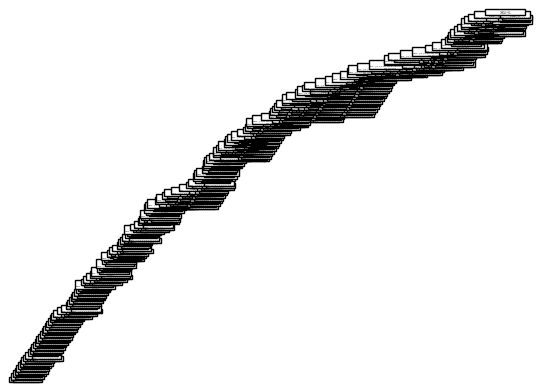

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
plot_tree(model1)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
model2=KNeighborsClassifier()

In [82]:
model2.fit(x_train,y_train)

KNeighborsClassifier()

In [83]:
y_pred=model2.predict(x_test)

In [84]:
y_predict=model2.predict(x_train)

In [85]:
accuracy_score(y_test,y_pred)

0.5948275862068966

In [86]:
accuracy_score(y_train,y_predict)

0.7608695652173914

In [60]:
len(x_train[0])

500

In [61]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7155172413793104


In [62]:
y_pred = model.predict(x_train)

In [63]:
accuracy_score(y_train, y_pred)

1.0

In [88]:
data.to_csv("data576.csv")